<a href="https://colab.research.google.com/github/the-redlord/comp455/blob/master/Project/Team5_finalv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: import

import tensorflow as tf
from tensorflow import keras

import os

from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.constraints import maxnorm
from keras.layers import  Conv2D, MaxPooling2D, BatchNormalization, Input


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

TensorFlow version: 2.3.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
#Load the dataset
(X_Train, Y_Train),(X_Test, Y_Test) = tf.keras.datasets.cifar10.load_data()

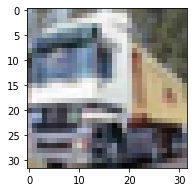

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(330+1+1)
plt.imshow(X_Train[1])
plt.show()
#print(Y_Train)

In [4]:
#Step 2: Data pre-processiing 


#Normalize the dataset
X_Train = X_Train.astype('float32')
X_Test = X_Test.astype('float32')

# X_Train = X_Train/255.0
# X_Test= X_Test/255.0

#z-score
mean = np.mean(X_Train,axis=(0,1,2,3))
std = np.std(X_Train,axis=(0,1,2,3))
X_Train = (X_Train-mean)/(std+1e-7)
X_Test = (X_Test-mean)/(std+1e-7)

In [5]:
X_Train.shape

(50000, 32, 32, 3)

In [6]:
#Now one hot encoding on Y_Test

#convert vectors into Binary class matrices

Y_Train=keras.utils.to_categorical(Y_Train)
Y_Test=keras.utils.to_categorical(Y_Test)

In [7]:
cifar_classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

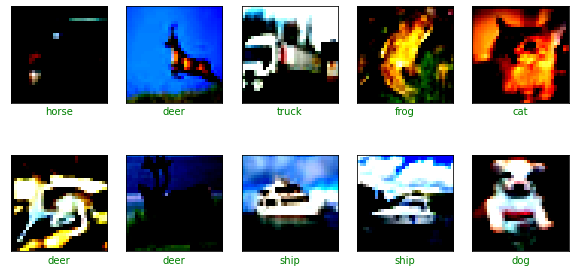

In [8]:
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False)
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])

    # show correct prediction in green and wrong in red
    col ='green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(cifar_classes[np.argmax(p[i])],color=col)
  plt.show()

show_random_examples(X_Train,Y_Train,Y_Train)

In [9]:
#CHeck the shape of Y_Train
num_classes = Y_Train.shape[1]

In [10]:
#Step 3: Model Creation

weight_decay = 1e-4

model = Sequential()

model.add(Input(shape=(32,32,3)))

model.add(Conv2D(32,3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(64,3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128,3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))

#compile the model

opt_rms = RMSprop(lr=0.001,decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [12]:
history = model.fit(X_Train, Y_Train, validation_data=(X_Test,Y_Test), epochs=100, batch_size=256,callbacks=[
                tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                   save_best_only=True,save_weights_only=False,
                                                   monitor='val_accuracy')
              ])

Epoch 1/100
196/196 [==============================] - 4s 19ms/step - loss: 1.8975 - accuracy: 0.3529 - val_loss: 2.2741 - val_accuracy: 0.2177
Epoch 2/100
196/196 [==============================] - 3s 17ms/step - loss: 1.3358 - accuracy: 0.5347 - val_loss: 1.5769 - val_accuracy: 0.4696
Epoch 3/100
196/196 [==============================] - 3s 17ms/step - loss: 1.1067 - accuracy: 0.6228 - val_loss: 1.0819 - val_accuracy: 0.6323
Epoch 4/100
196/196 [==============================] - 3s 17ms/step - loss: 0.9723 - accuracy: 0.6746 - val_loss: 0.9309 - val_accuracy: 0.6956
Epoch 5/100
196/196 [==============================] - 3s 17ms/step - loss: 0.8769 - accuracy: 0.7110 - val_loss: 1.1279 - val_accuracy: 0.6643
Epoch 6/100
196/196 [==============================] - 3s 17ms/step - loss: 0.8086 - accuracy: 0.7380 - val_loss: 1.0890 - val_accuracy: 0.6701
Epoch 7/100
196/196 [==============================] - 3s 17ms/step - loss: 0.7593 - accuracy: 0.7541 - val_loss: 0.7789 - val_accuracy:

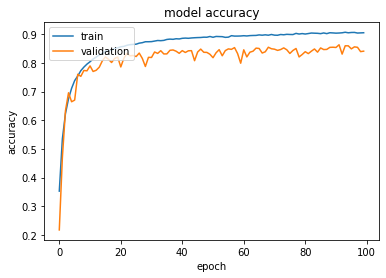

In [13]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

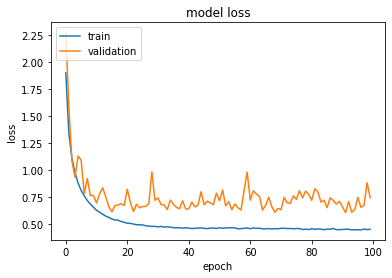

In [14]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [15]:
#Step 4: Evaluation
loss, accuracy_= model.evaluate(X_Test, Y_Test)
print("Accuracy of this model is: ", accuracy_*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.7428 - accuracy: 0.8406
Accuracy of this model is:  84.06000137329102


In [16]:
preds = model.predict(X_Test)

In [17]:
Y_Train.shape

(50000, 10)

In [18]:
preds.shape

(10000, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

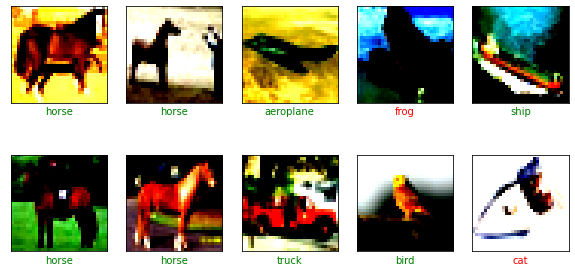

In [21]:
show_random_examples(X_Test,Y_Test,preds)